In [16]:
import numpy as np
import pandas as pd 
import random
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sb
import seaborn as sns
import warnings
import math
from math import isnan
warnings.filterwarnings("ignore")

In [56]:
Data = pd.read_csv('C:/Users/mia.kong/OneDrive - Canadian Tire/Desktop/Survey Analyze/Python Code/Employee Behaviour/Survey Data.csv')  
Data.head()

,Respondent ID,Collector ID,Start Date,End Date,IP Address,NPS,Detractors feedback,Passives feedback,Promoters feedback,Prior course knowledge,After course knowledge,Division,Role,Course Name,Course Type,First time
0,12246985268,263245465,12/10/2020 16:32,12/10/2020 16:32,99.252.69.113,9,NaN,NaN,NaN,NaN,NaN,NaN,Forecasting Analyst,Inventory Management Basics,Self-directed,NaN
1,12179406900,263245465,11/17/2020 20:48,11/17/2020 20:49,99.240.132.190,7,NaN,NaN,NaN,NaN,NaN,NaN,Forecasting Analyst,Inventory Management Basics,Self-directed,NaN
2,12043039162,263245465,10/02/2020 23:04,10/02/2020 23:05,99.246.167.93,8,NaN,NaN,NaN,NaN,NaN,NaN,Forecasting Analyst,Inventory Management Basics,Self-directed,NaN
3,12011013117,263245465,09/22/2020 17:43,09/22/2020 17:43,170.52.68.9,8,NaN,NaN,NaN,NaN,NaN,NaN,CBA,Inventory Management Basics,Self-directed,NaN
4,11973635491,263245465,09/09/2020 15:50,09/09/2020 15:50,172.97.250.147,9,NaN,NaN,NaN,NaN,NaN,NaN,CBA,Inventory Management Basics,Self-directed,NaN


In [57]:
def f(NPS):
    if NPS <= 6:
        return "Detractor"
    elif NPS >6 and NPS<=8:
        return "Passive"
    elif NPS >=9 and NPS <=10:
        return "Promoter"

In [58]:
Data['NPS Type']=Data['NPS'].apply(f)
Data.head()

,Respondent ID,Collector ID,Start Date,End Date,IP Address,NPS,Detractors feedback,Passives feedback,Promoters feedback,Prior course knowledge,After course knowledge,Division,Role,Course Name,Course Type,First time,NPS Type
0,12246985268,263245465,12/10/2020 16:32,12/10/2020 16:32,99.252.69.113,9,NaN,NaN,NaN,NaN,NaN,NaN,Forecasting Analyst,Inventory Management Basics,Self-directed,NaN,Promoter
1,12179406900,263245465,11/17/2020 20:48,11/17/2020 20:49,99.240.132.190,7,NaN,NaN,NaN,NaN,NaN,NaN,Forecasting Analyst,Inventory Management Basics,Self-directed,NaN,Passive
2,12043039162,263245465,10/02/2020 23:04,10/02/2020 23:05,99.246.167.93,8,NaN,NaN,NaN,NaN,NaN,NaN,Forecasting Analyst,Inventory Management Basics,Self-directed,NaN,Passive
3,12011013117,263245465,09/22/2020 17:43,09/22/2020 17:43,170.52.68.9,8,NaN,NaN,NaN,NaN,NaN,NaN,CBA,Inventory Management Basics,Self-directed,NaN,Passive
4,11973635491,263245465,09/09/2020 15:50,09/09/2020 15:50,172.97.250.147,9,NaN,NaN,NaN,NaN,NaN,NaN,CBA,Inventory Management Basics,Self-directed,NaN,Promoter


##### Data Cleanning

In [59]:
#Value counts, check Typo!!!!
for col in ['Division',
 'Role',
 'Course Name',
 'Course Type']:
        print(Data[col].value_counts())

Automotive - General Merch    40
Living                        36
Playing                       33
Seasonal & Gardening          26
Fixing                        22
Automotive - Parts            13
Automotive - Hard Parts        8
Name: Division, dtype: int64
Category Business Analyst         99
CBA                               61
Forecasting Analyst               47
Pricing Specialist                10
Category Business Manager/ACBM     6
CBP                                4
Name: Role, dtype: int64
CBA Onboarding                   35
Fundamentals of Analytics        30
CBM Assortment Decision          23
Tools of Analytics               23
Advanced Product Execution       22
FA Onboarding                    16
Data Vault                       16
Assortment Forecasting           12
Promo season forecasting         11
Build RFQ                        11
Category Management Framework     6
Inventory Management Basics       6
Forecasting Promo Late Deal       5
PS Onboarding            

In [60]:
Data['Division']=Data['Division'].replace("Automotive - Parts","Automotive - Hard Parts")

In [61]:
Data['Role']=Data['Role'].replace("CBA","Category Business Analyst")
Data['Role']=Data['Role'].replace("CBP","Category Business Planning")

In [62]:
#Value counts, check Typo!!!!
for col in ['Division',
 'Role','First time']:
        print(Data[col].value_counts())

Automotive - General Merch    40
Living                        36
Playing                       33
Seasonal & Gardening          26
Fixing                        22
Automotive - Hard Parts       21
Name: Division, dtype: int64
Category Business Analyst         160
Forecasting Analyst                47
Pricing Specialist                 10
Category Business Manager/ACBM      6
Category Business Planning          4
Name: Role, dtype: int64
Yes    85
No     26
Name: First time, dtype: int64


###### Deal with missing value

In [63]:
Data.isna().sum()

Respondent ID               0
Collector ID                0
Start Date                  0
End Date                    0
IP Address                  0
NPS                         0
Detractors feedback       222
Passives feedback         182
Promoters feedback         85
Prior course knowledge    166
After course knowledge    166
Division                   49
Role                        0
Course Name                 0
Course Type                 0
First time                116
NPS Type                    0
dtype: int64

#### imputing missing value as a new group 

In [64]:
Data['Division'] = Data['Division'].fillna("Unkonwn")
Data['First time'] = Data['First time'].fillna("Unkonwn")
Data['Prior course knowledge'] = Data['Prior course knowledge'].fillna("Unkonwn")
Data['After course knowledge'] = Data['After course knowledge'].fillna("Unkonwn")
Data['Detractors feedback'] = Data['Detractors feedback'].fillna("")
Data['Passives feedback'] = Data['Passives feedback'].fillna("")
Data['Promoters feedback'] = Data['Promoters feedback'].fillna("")
Data

,Respondent ID,Collector ID,Start Date,End Date,IP Address,NPS,Detractors feedback,Passives feedback,Promoters feedback,Prior course knowledge,After course knowledge,Division,Role,Course Name,Course Type,First time,NPS Type
0,12246985268,263245465,12/10/2020 16:32,12/10/2020 16:32,99.252.69.113,9,,,,Unkonwn,Unkonwn,Unkonwn,Forecasting Analyst,Inventory Management Basics,Self-directed,Unkonwn,Promoter
1,12179406900,263245465,11/17/2020 20:48,11/17/2020 20:49,99.240.132.190,7,,,,Unkonwn,Unkonwn,Unkonwn,Forecasting Analyst,Inventory Management Basics,Self-directed,Unkonwn,Passive
2,12043039162,263245465,10/02/2020 23:04,10/02/2020 23:05,99.246.167.93,8,,,,Unkonwn,Unkonwn,Unkonwn,Forecasting Analyst,Inventory Management Basics,Self-directed,Unkonwn,Passive
3,12011013117,263245465,09/22/2020 17:43,09/22/2020 17:43,170.52.68.9,8,,,,Unkonwn,Unkonwn,Unkonwn,Category Business Analyst,Inventory Management Basics,Self-directed,Unkonwn,Passive
4,11973635491,263245465,09/09/2020 15:50,09/09/2020 15:50,172.97.250.147,9,,,,Unkonwn,Unkonwn,Unkonwn,Category Business Analyst,Inventory Management Basics,Self-directed,Unkonwn,Promoter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,11709822976,262172241,06/18/2020 11:27,06/18/2020 11:27,184.145.69.133,10,,,detailed and engaging,Unkonwn,Unkonwn,Seasonal & Gardening,Category Business Analyst,Tools of Analytics,Onboarding,Unkonwn,Promoter
223,11709822068,262172241,06/18/2020 11:26,06/18/2020 11:28,24.114.99.0,10,,,A really great course! I know that some was re...,Unkonwn,Unkonwn,Living,Category Business Analyst,Tools of Analytics,Onboarding,Unkonwn,Promoter
224,11702461458,262172241,06/16/2020 11:53,06/16/2020 15:19,99.234.138.51,10,,,I enjoyed going through different thought spot...,Unkonwn,Unkonwn,Seasonal & Gardening,Category Business Analyst,Tools of Analytics,Onboarding,Unkonwn,Promoter
225,11926202861,253298738,08/23/2020 13:39,08/23/2020 13:41,99.224.71.94,10,,,"Easy to follow, clearly outlined the steps and...",Poor,Good,Living,Category Business Analyst,Assortment Update,Self-directed,Yes,Promoter


###### Imputing missing value by most frequency words

In [65]:
#Data['Division'] = Data['Division'].fillna(Data['Division'].value_counts().index[0])

In [66]:
#Data.isna().sum()

In [67]:
#Data

In [192]:
#Value counts, check Typo!!!!
#for col in ['Division']:
#       print(Data[col].value_counts())

Living                        85
Automotive - General Merch    40
Playing                       33
Seasonal & Gardening          26
Fixing                        22
Automotive - Hard Parts       21
Name: Division, dtype: int64


# imputing missing number by KNN

In [88]:
# from sklearn.impute import KNNImputer

In [106]:
#cat_variables = Data[['Division', 'Role','Course Name','Course Type','NPS Type']]
#cat_dummies = pd.get_dummies(cat_variables)
#cat_dummies.loc[cat_variables.Division.isnull(), cat_dummies.columns.str.startswith("Division_")] = np.nan
#cat_dummies

,Division_Automotive - General Merch,Division_Automotive - Hard Parts,Division_Fixing,Division_Living,Division_Playing,Division_Seasonal & Gardening,Role_Category Business Analyst,Role_Category Business Manager/ACBM,Role_Category Business Planning,Role_Forecasting Analyst,...,Course Name_Inventory Management Basics,Course Name_PS Onboarding,Course Name_Promo season forecasting,Course Name_Tools of Analytics,Course Type_JIT,Course Type_Onboarding,Course Type_Self-directed,NPS Type_Detractor,NPS Type_Passive,NPS Type_Promoter
0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,...,1,0,0,0,0,0,1,0,0,1
1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,...,1,0,0,0,0,0,1,0,1,0
2,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,...,1,0,0,0,0,0,1,0,1,0
3,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0
4,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
223,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
224,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
225,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [107]:
#cat_dummies.isna().sum()

Division_Automotive - General Merch          49
Division_Automotive - Hard Parts             49
Division_Fixing                              49
Division_Living                              49
Division_Playing                             49
Division_Seasonal & Gardening                49
Role_Category Business Analyst                0
Role_Category Business Manager/ACBM           0
Role_Category Business Planning               0
Role_Forecasting Analyst                      0
Role_Pricing Specialist                       0
Course Name_Advanced Product Execution        0
Course Name_Assortment Forecasting            0
Course Name_Assortment Update                 0
Course Name_Build RFQ                         0
Course Name_CBA Onboarding                    0
Course Name_CBM Assortment Decision           0
Course Name_CBP Onboarding                    0
Course Name_Category Management Framework     0
Course Name_Data Vault                        0
Course Name_FA Onboarding               

In [108]:
#Data = Data.drop(['Division', 'Role','Course Name','Course Type','NPS Type'], axis=1)
#Data_KNN = pd.concat([Data['NPS'], cat_dummies], axis=1)
#Data_KNN.head()

,NPS,Division_Automotive - General Merch,Division_Automotive - Hard Parts,Division_Fixing,Division_Living,Division_Playing,Division_Seasonal & Gardening,Role_Category Business Analyst,Role_Category Business Manager/ACBM,Role_Category Business Planning,...,Course Name_Inventory Management Basics,Course Name_PS Onboarding,Course Name_Promo season forecasting,Course Name_Tools of Analytics,Course Type_JIT,Course Type_Onboarding,Course Type_Self-directed,NPS Type_Detractor,NPS Type_Passive,NPS Type_Promoter
0,9,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,1,0,0,0,0,0,1,0,0,1
1,7,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,1,0,0,0,0,0,1,0,1,0
2,8,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,1,0,0,0,0,0,1,0,1,0
3,8,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,...,1,0,0,0,0,0,1,0,1,0
4,9,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,...,1,0,0,0,0,0,1,0,0,1


In [109]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#Data_KNN = pd.DataFrame(scaler.fit_transform(Data_KNN), columns = Data_KNN.columns)
#Data_KNN.head()

,NPS,Division_Automotive - General Merch,Division_Automotive - Hard Parts,Division_Fixing,Division_Living,Division_Playing,Division_Seasonal & Gardening,Role_Category Business Analyst,Role_Category Business Manager/ACBM,Role_Category Business Planning,...,Course Name_Inventory Management Basics,Course Name_PS Onboarding,Course Name_Promo season forecasting,Course Name_Tools of Analytics,Course Type_JIT,Course Type_Onboarding,Course Type_Self-directed,NPS Type_Detractor,NPS Type_Passive,NPS Type_Promoter
0,0.833333,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.833333,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [111]:
#from sklearn.impute import KNNImputer
#imputer = KNNImputer(n_neighbors=5)
#Data_KNN = pd.DataFrame(imputer.fit_transform(Data_KNN),columns = Data_KNN.columns)

In [112]:
#Data_KNN

,NPS,Division_Automotive - General Merch,Division_Automotive - Hard Parts,Division_Fixing,Division_Living,Division_Playing,Division_Seasonal & Gardening,Role_Category Business Analyst,Role_Category Business Manager/ACBM,Role_Category Business Planning,...,Course Name_Inventory Management Basics,Course Name_PS Onboarding,Course Name_Promo season forecasting,Course Name_Tools of Analytics,Course Type_JIT,Course Type_Onboarding,Course Type_Self-directed,NPS Type_Detractor,NPS Type_Passive,NPS Type_Promoter
0,0.833333,0.0,0.0,0.4,0.0,0.4,0.2,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.500000,0.4,0.2,0.0,0.2,0.0,0.2,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.666667,0.4,0.4,0.0,0.0,0.2,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.666667,0.2,0.2,0.0,0.2,0.2,0.2,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.833333,0.0,0.2,0.2,0.6,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
223,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
224,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
225,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [113]:
#Data_KNN.isna().sum()

NPS                                          0
Division_Automotive - General Merch          0
Division_Automotive - Hard Parts             0
Division_Fixing                              0
Division_Living                              0
Division_Playing                             0
Division_Seasonal & Gardening                0
Role_Category Business Analyst               0
Role_Category Business Manager/ACBM          0
Role_Category Business Planning              0
Role_Forecasting Analyst                     0
Role_Pricing Specialist                      0
Course Name_Advanced Product Execution       0
Course Name_Assortment Forecasting           0
Course Name_Assortment Update                0
Course Name_Build RFQ                        0
Course Name_CBA Onboarding                   0
Course Name_CBM Assortment Decision          0
Course Name_CBP Onboarding                   0
Course Name_Category Management Framework    0
Course Name_Data Vault                       0
Course Name_F

In [68]:
Data.isna().sum()

Respondent ID             0
Collector ID              0
Start Date                0
End Date                  0
IP Address                0
NPS                       0
Detractors feedback       0
Passives feedback         0
Promoters feedback        0
Prior course knowledge    0
After course knowledge    0
Division                  0
Role                      0
Course Name               0
Course Type               0
First time                0
NPS Type                  0
dtype: int64

# Sentiment Analysis

In [69]:
import textblob           
from textblob import TextBlob

In [70]:
Data['Feedback']=Data['Detractors feedback']+Data['Passives feedback']+Data['Promoters feedback']

In [71]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

Data['polarity'] = Data['Feedback'].apply(getPolarity)
Data['Subjectivity'] = Data['Feedback'].apply(getSubjectivity)



In [72]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
Data['Sentiment_Analysis'] = Data['polarity'].apply(getAnalysis)

Data.head(10)

,Respondent ID,Collector ID,Start Date,End Date,IP Address,NPS,Detractors feedback,Passives feedback,Promoters feedback,Prior course knowledge,...,Division,Role,Course Name,Course Type,First time,NPS Type,Feedback,polarity,Subjectivity,Sentiment_Analysis
0,12246985268,263245465,12/10/2020 16:32,12/10/2020 16:32,99.252.69.113,9,,,,Unkonwn,...,Unkonwn,Forecasting Analyst,Inventory Management Basics,Self-directed,Unkonwn,Promoter,,0.000000,0.000000,Neutral
1,12179406900,263245465,11/17/2020 20:48,11/17/2020 20:49,99.240.132.190,7,,,,Unkonwn,...,Unkonwn,Forecasting Analyst,Inventory Management Basics,Self-directed,Unkonwn,Passive,,0.000000,0.000000,Neutral
2,12043039162,263245465,10/02/2020 23:04,10/02/2020 23:05,99.246.167.93,8,,,,Unkonwn,...,Unkonwn,Forecasting Analyst,Inventory Management Basics,Self-directed,Unkonwn,Passive,,0.000000,0.000000,Neutral
3,12011013117,263245465,09/22/2020 17:43,09/22/2020 17:43,170.52.68.9,8,,,,Unkonwn,...,Unkonwn,Category Business Analyst,Inventory Management Basics,Self-directed,Unkonwn,Passive,,0.000000,0.000000,Neutral
4,11973635491,263245465,09/09/2020 15:50,09/09/2020 15:50,172.97.250.147,9,,,,Unkonwn,...,Unkonwn,Category Business Analyst,Inventory Management Basics,Self-directed,Unkonwn,Promoter,,0.000000,0.000000,Neutral
5,11973515355,263245465,09/09/2020 15:09,09/09/2020 15:09,198.52.172.141,7,,"More audio, less reading",,Poor,...,Unkonwn,Category Business Analyst,Inventory Management Basics,Self-directed,Unkonwn,Passive,"More audio, less reading",0.166667,0.283333,Positive
6,12238243891,253305724,12/08/2020 10:42,12/08/2020 10:42,104.249.225.115,8,,,,Unkonwn,...,Unkonwn,Forecasting Analyst,Promo season forecasting,Self-directed,Unkonwn,Passive,,0.000000,0.000000,Neutral
7,12210690194,253305724,11/29/2020 13:47,11/29/2020 13:49,99.240.132.190,10,,,A lot of tips on how to best work with the pro...,Fair,...,Fixing,Forecasting Analyst,Promo season forecasting,Self-directed,Unkonwn,Promoter,A lot of tips on how to best work with the pro...,1.000000,0.300000,Positive
8,12006288111,253305724,09/21/2020 12:08,09/21/2020 12:09,172.97.240.78,8,,,,Unkonwn,...,Unkonwn,Forecasting Analyst,Promo season forecasting,Self-directed,Unkonwn,Passive,,0.000000,0.000000,Neutral
9,11987105767,253305724,09/14/2020 15:37,09/14/2020 15:38,70.52.142.63,9,,,"It gives a good general starting point, which ...",Poor,...,Seasonal & Gardening,Forecasting Analyst,Promo season forecasting,Self-directed,Unkonwn,Promoter,"It gives a good general starting point, which ...",0.177273,0.530909,Positive


# Exploratory Analysis

#### Understand Employee's Behaviour

###### Question: What is the relation between Division and NPS's classification?

In [211]:
Data.groupby(['NPS Type'])['Division'].value_counts(normalize=True)

NPS Type   Division                  
Detractor  Playing                       0.250000
           Seasonal & Gardening          0.250000
           Unkonwn                       0.250000
           Automotive - General Merch    0.125000
           Fixing                        0.125000
Passive    Unkonwn                       0.306452
           Automotive - General Merch    0.145161
           Playing                       0.145161
           Automotive - Hard Parts       0.112903
           Living                        0.112903
           Seasonal & Gardening          0.096774
           Fixing                        0.080645
Promoter   Automotive - General Merch    0.191083
           Living                        0.184713
           Unkonwn                       0.178344
           Playing                       0.140127
           Seasonal & Gardening          0.114650
           Fixing                        0.101911
           Automotive - Hard Parts       0.089172
Name: Divisi

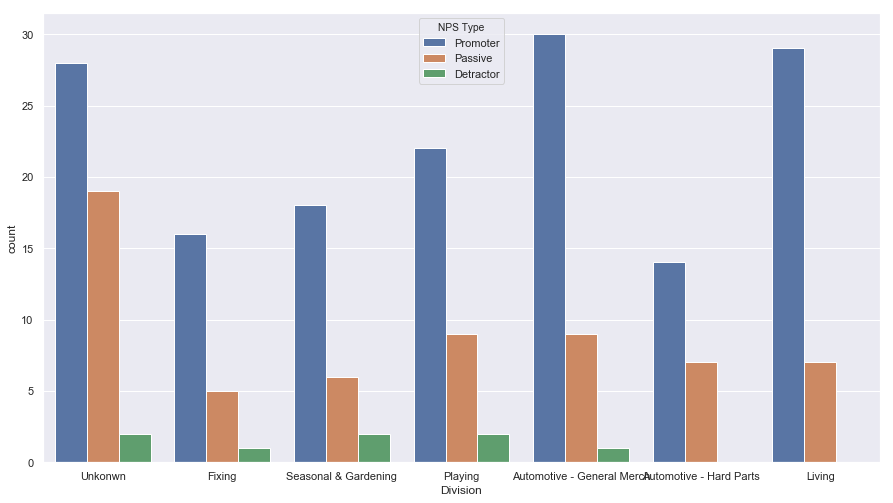

In [242]:
sns.set(rc={'figure.figsize':(15,8.27)})
sns.countplot(x ='Division', hue = "NPS Type", data = Data)
 
# Show the plot
plt.show()

Auto-GM is the division which is the most frequency to give promoter NPS, the next one is living. the most frequency privided detractor division is playing and season&garden

###### Question: What is the relation between Role and NPS's classification?

In [213]:
Data.groupby(['Role'])['NPS Type'].value_counts(normalize=True)

Role                            NPS Type 
Category Business Analyst       Promoter     0.725000
                                Passive      0.231250
                                Detractor    0.043750
Category Business Manager/ACBM  Promoter     0.666667
                                Passive      0.333333
Category Business Planning      Promoter     1.000000
Forecasting Analyst             Promoter     0.595745
                                Passive      0.404255
Pricing Specialist              Promoter     0.500000
                                Passive      0.400000
                                Detractor    0.100000
Name: NPS Type, dtype: float64

CBA is the group who is easilest to become promoter. the next groups are CBM, FA and PS. Since we have less sample data of CBP, we cannot draw the conclusion now.

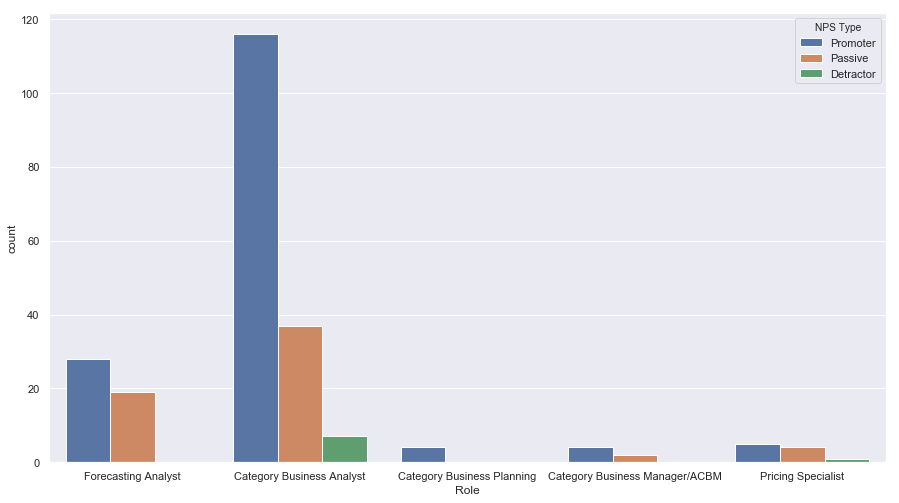

In [18]:
sns.set(rc={'figure.figsize':(15,8.27)})
sns.countplot(x ='Role', hue = "NPS Type", data = Data)
 
# Show the plot
plt.show()

#### Understand Course's Performance

###### Question: What is the relation between course and NPS's classification?

In [217]:
Data.groupby(['Course Name'])['NPS Type'].value_counts(normalize=True)

Course Name                    NPS Type 
Advanced Product Execution     Promoter     0.727273
                               Passive      0.181818
                               Detractor    0.090909
Assortment Forecasting         Promoter     0.583333
                               Passive      0.416667
Assortment Update              Passive      0.500000
                               Promoter     0.500000
Build RFQ                      Promoter     0.909091
                               Passive      0.090909
CBA Onboarding                 Promoter     0.771429
                               Passive      0.200000
                               Detractor    0.028571
CBM Assortment Decision        Promoter     0.739130
                               Passive      0.260870
CBP Onboarding                 Promoter     1.000000
Category Management Framework  Promoter     0.500000
                               Passive      0.333333
                               Detractor    0.166667
Data 

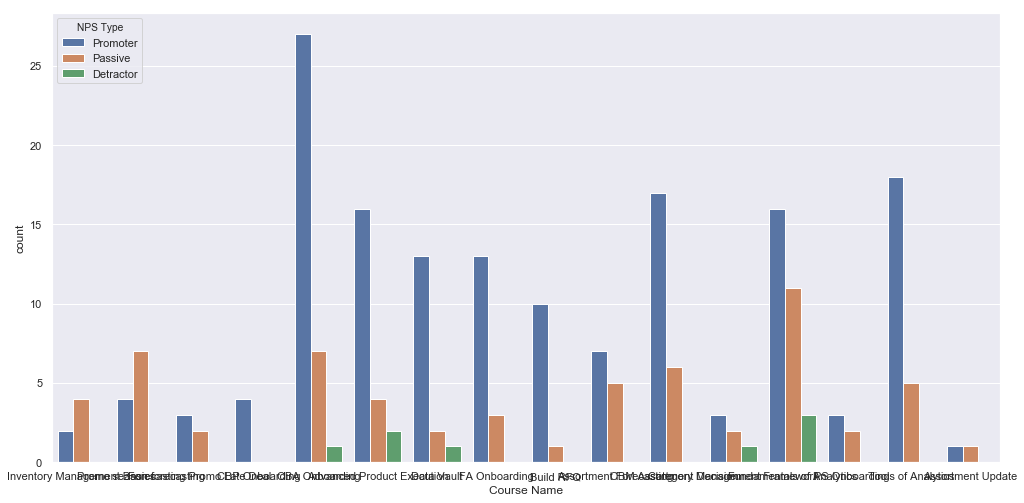

In [20]:
sns.set(rc={'figure.figsize':(17,8.27)})
sns.countplot(x ='Course Name', hue = "NPS Type", data = Data)
 
# Show the plot
plt.show()

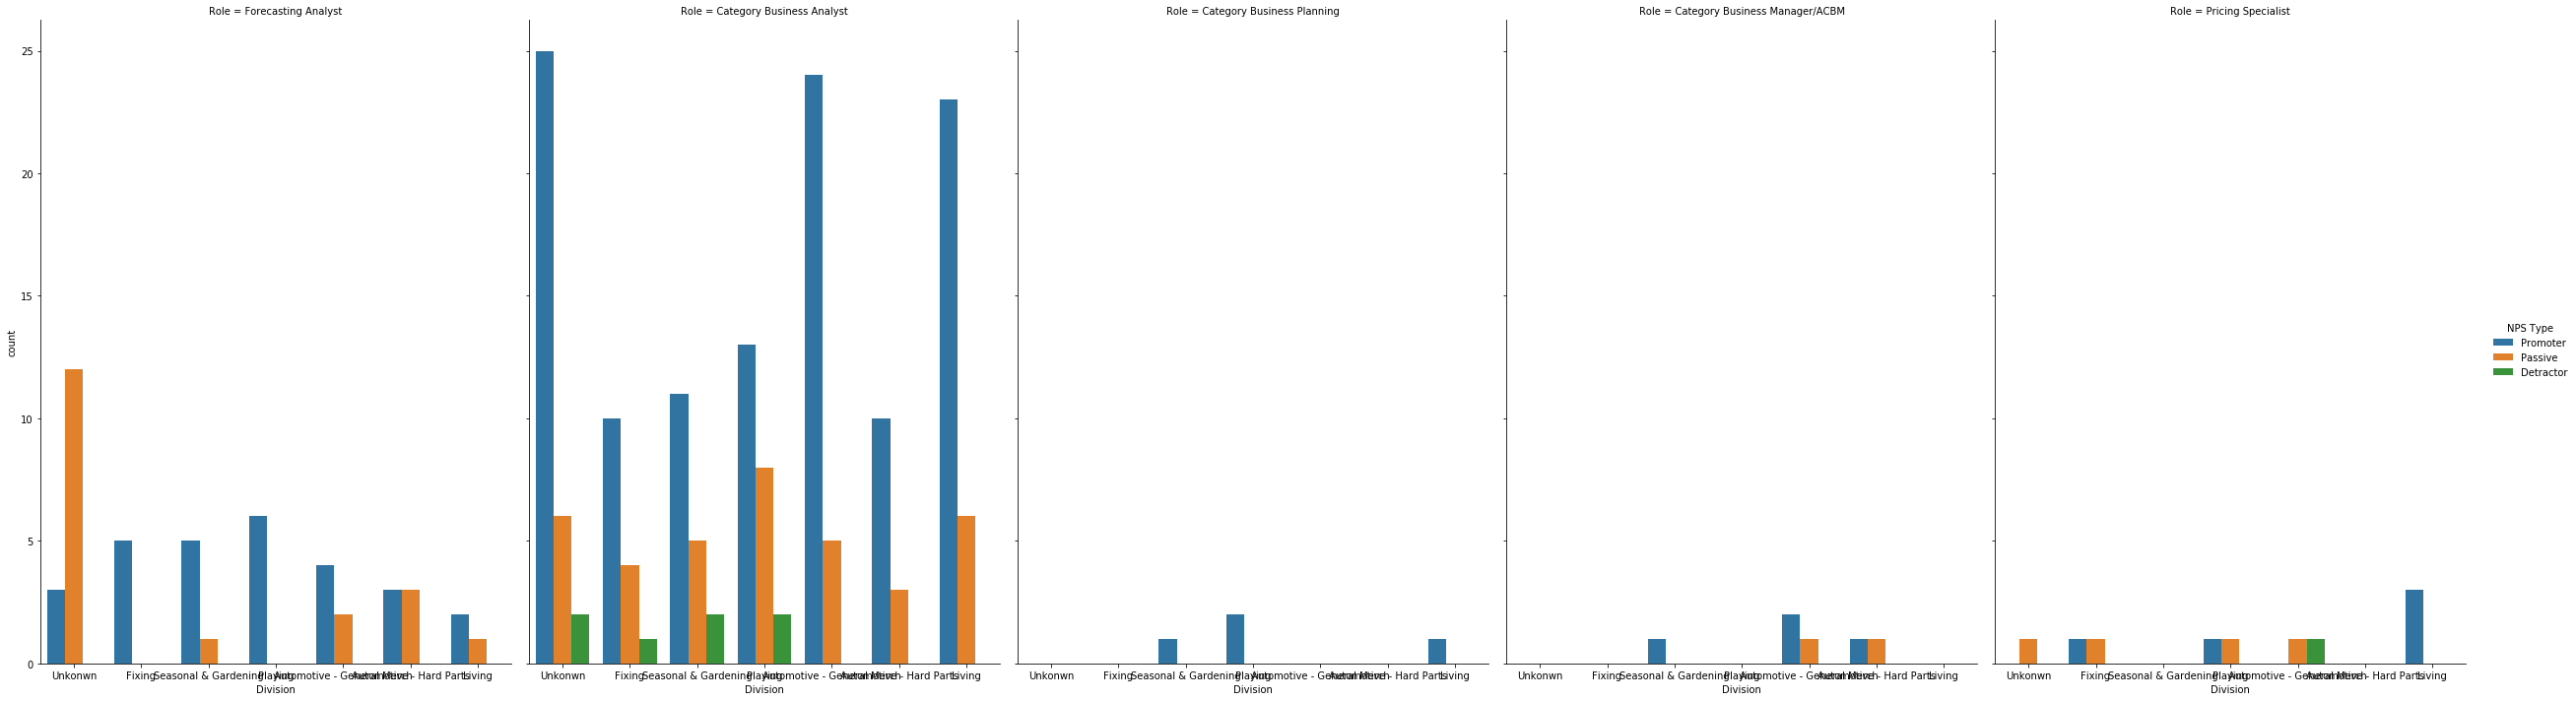

In [13]:
sns.catplot(x="Division", hue="NPS Type", col="Role",
                data=Data, kind="count",
                height=10, aspect=0.7);

#### Question: What is the relation between course type and NPS's classification?

In [14]:
Data.groupby(['Course Type'])['NPS Type'].value_counts(normalize=True)

Course Type    NPS Type 
JIT            Promoter     0.758065
               Passive      0.225806
               Detractor    0.016129
Onboarding     Promoter     0.714286
               Passive      0.242857
               Detractor    0.042857
Self-directed  Passive      0.560000
               Promoter     0.400000
               Detractor    0.040000
Name: NPS Type, dtype: float64

JIT is the type of course which is the easiest to get the promoter and the lowest probability to get detractor. the next one is onboarding. Self-directed course is easiest to get passive. the probability to get detractor is similar with  onboarding course.

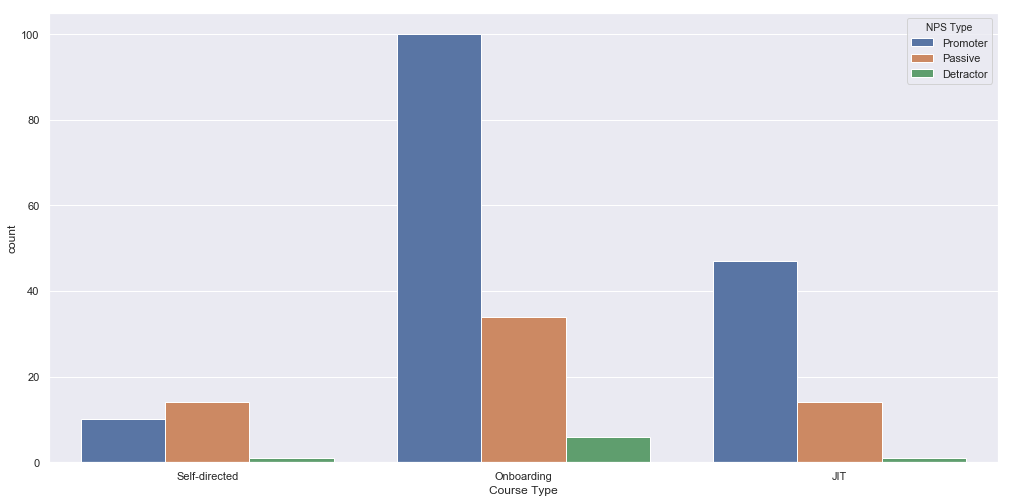

In [21]:
sns.set(rc={'figure.figsize':(17,8.27)})
sns.countplot(x ='Course Type', hue = "NPS Type", data = Data)
 
# Show the plot
plt.show()

#### Question: What is the relation between prior course knowledge and NPS's classification?

In [23]:
Data.groupby(['Prior course knowledge'])['NPS Type'].value_counts(normalize=True)

Prior course knowledge  NPS Type 
Excellent               Promoter     1.000000
Fair                    Promoter     0.727273
                        Passive      0.272727
Good                    Promoter     0.923077
                        Passive      0.076923
Poor                    Promoter     0.590909
                        Passive      0.318182
                        Detractor    0.090909
Unkonwn                 Promoter     0.674699
                        Passive      0.289157
                        Detractor    0.036145
Name: NPS Type, dtype: float64

The probability of promoter is the highest for all options. In other words, this ferature is not a significant feature to our model.

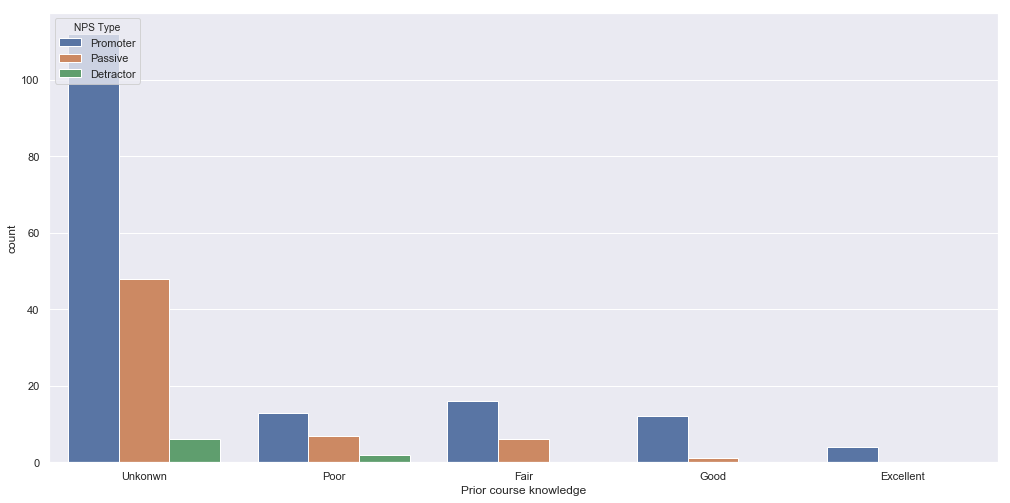

In [24]:
sns.set(rc={'figure.figsize':(17,8.27)})
sns.countplot(x ='Prior course knowledge', hue = "NPS Type", data = Data)
 
# Show the plot
plt.show()

#### Question: What is the relation between after course knowledge and NPS's classification?

In [25]:
Data.groupby(['After course knowledge'])['NPS Type'].value_counts(normalize=True)

After course knowledge  NPS Type 
Excellent               Promoter     0.894737
                        Passive      0.105263
Fair                    Passive      0.625000
                        Detractor    0.250000
                        Promoter     0.125000
Good                    Promoter     0.794118
                        Passive      0.205882
Unkonwn                 Promoter     0.674699
                        Passive      0.289157
                        Detractor    0.036145
Name: NPS Type, dtype: float64

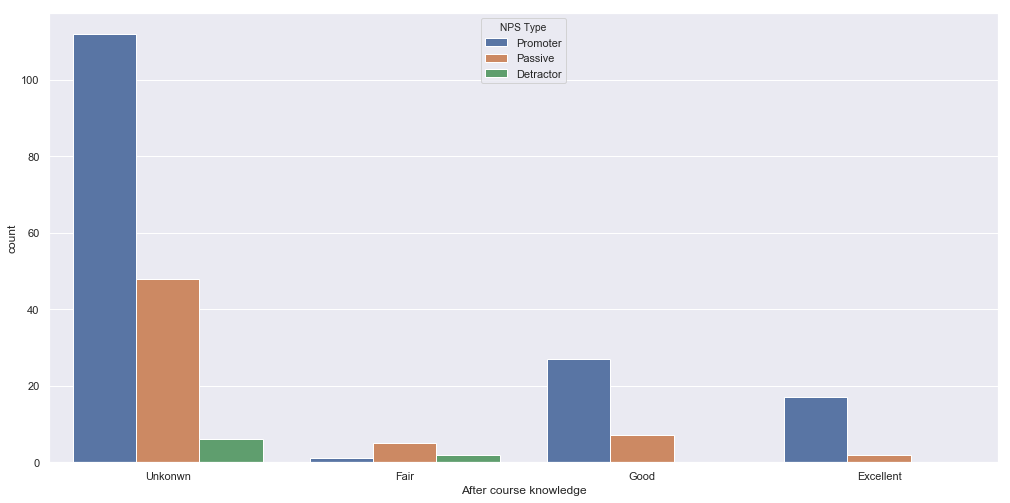

In [26]:
sns.set(rc={'figure.figsize':(17,8.27)})
sns.countplot(x ='After course knowledge', hue = "NPS Type", data = Data)
 
# Show the plot
plt.show()

#### Question: What is the relation between first time to the task/take the courses and NPS's classification?

In [27]:
Data.groupby(['First time'])['NPS Type'].value_counts(normalize=True)

First time  NPS Type 
No          Promoter     0.884615
            Passive      0.115385
Unkonwn     Promoter     0.612069
            Passive      0.344828
            Detractor    0.043103
Yes         Promoter     0.741176
            Passive      0.223529
            Detractor    0.035294
Name: NPS Type, dtype: float64

the learner who took the course before or they  finish the task before, they likely provide higher NPS. The reason maybe because they know what they are going to learn/what they want to learn and the course match their requirement. For the learner who are the first time to do the task/attend this course, they don't have the correct expectation about what they need to know. If they expect more and we don't think they need these knowledge, they would provide lower NPS. 

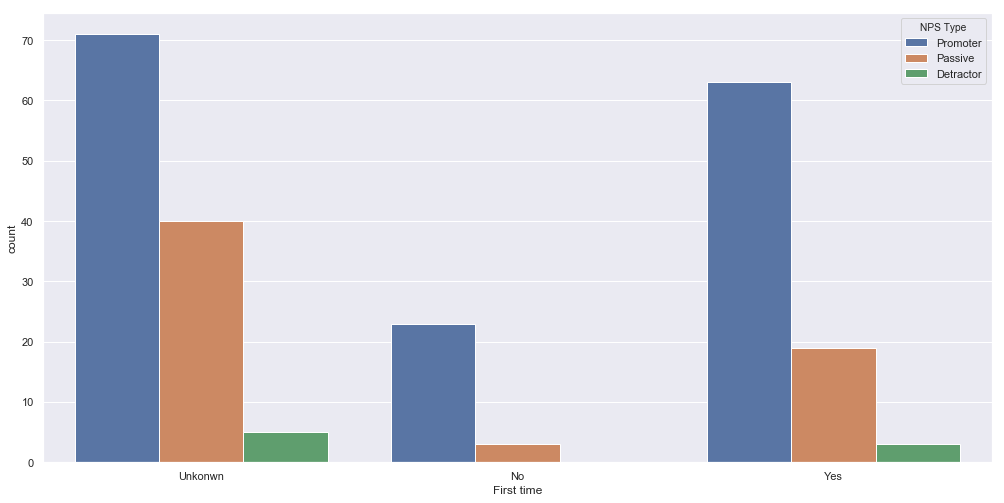

In [28]:
sns.set(rc={'figure.figsize':(17,8.27)})
sns.countplot(x ='First time', hue = "NPS Type", data = Data)
 
# Show the plot
plt.show()

#### Question: What is the relation between Sentiment_Analysis and NPS's classification?

In [73]:
Data.groupby(['Sentiment_Analysis'])['NPS Type'].value_counts(normalize=True)

Sentiment_Analysis  NPS Type 
Negative            Passive      0.857143
                    Promoter     0.142857
Neutral             Passive      0.500000
                    Promoter     0.450000
                    Detractor    0.050000
Positive            Promoter     0.806250
                    Passive      0.162500
                    Detractor    0.031250
Name: NPS Type, dtype: float64

positive feedback most likely come from a promoter. negative and netural feedback most likely come from a passive. 

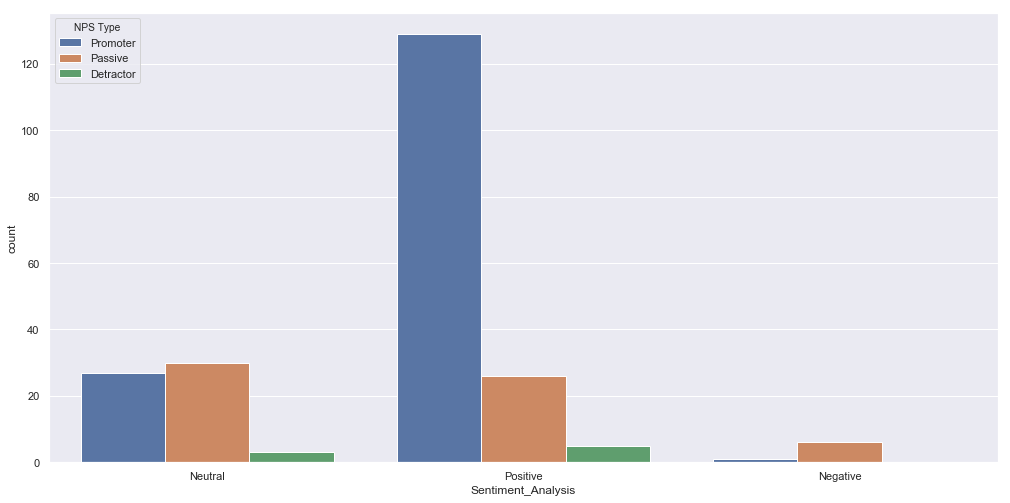

In [74]:
sns.set(rc={'figure.figsize':(17,8.27)})
sns.countplot(x ='Sentiment_Analysis', hue = "NPS Type", data = Data)
 
# Show the plot
plt.show()

# Build Cluster Model with K-Mode

#### Choice clustering dataset

In [75]:
df2 = Data[['NPS Type','After course knowledge','Division', 'Role','Course Type','First time','Sentiment_Analysis']]
df2.head()

,NPS Type,After course knowledge,Division,Role,Course Type,First time,Sentiment_Analysis
0,Promoter,Unkonwn,Unkonwn,Forecasting Analyst,Self-directed,Unkonwn,Neutral
1,Passive,Unkonwn,Unkonwn,Forecasting Analyst,Self-directed,Unkonwn,Neutral
2,Passive,Unkonwn,Unkonwn,Forecasting Analyst,Self-directed,Unkonwn,Neutral
3,Passive,Unkonwn,Unkonwn,Category Business Analyst,Self-directed,Unkonwn,Neutral
4,Promoter,Unkonwn,Unkonwn,Category Business Analyst,Self-directed,Unkonwn,Neutral


#### Lable the catagory variables

In [76]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [79]:
df3=MultiColumnLabelEncoder(columns = ['NPS Type','After course knowledge','Division', 'Role','Course Type','First time','Sentiment_Analysis']).fit_transform(df2)
df3.head()

,NPS Type,After course knowledge,Division,Role,Course Type,First time,Sentiment_Analysis
0,2,3,6,3,2,1,1
1,1,3,6,3,2,1,1
2,1,3,6,3,2,1,1
3,1,3,6,0,2,1,1
4,2,3,6,0,2,1,1


#### Using the Elbow Method to find the best K for K-mode based on our data

In [81]:
from kmodes.kmodes import KModes

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 641.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8, cost: 511.0
Run 1, iteration: 2/100, moves: 0, cost: 511.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 21, cost: 443.0
Run 1, iteration: 2/100, moves: 0, cost: 443.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 24, cost: 425.0
Run 1, iteration: 2/100, moves: 0, cost: 425.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 24, cost: 404.0
Run 1, iteration: 2/100, moves: 0, cost: 404.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 43, cost: 371.0
Run 1, iteration: 2/100, moves: 0, cost: 371.0

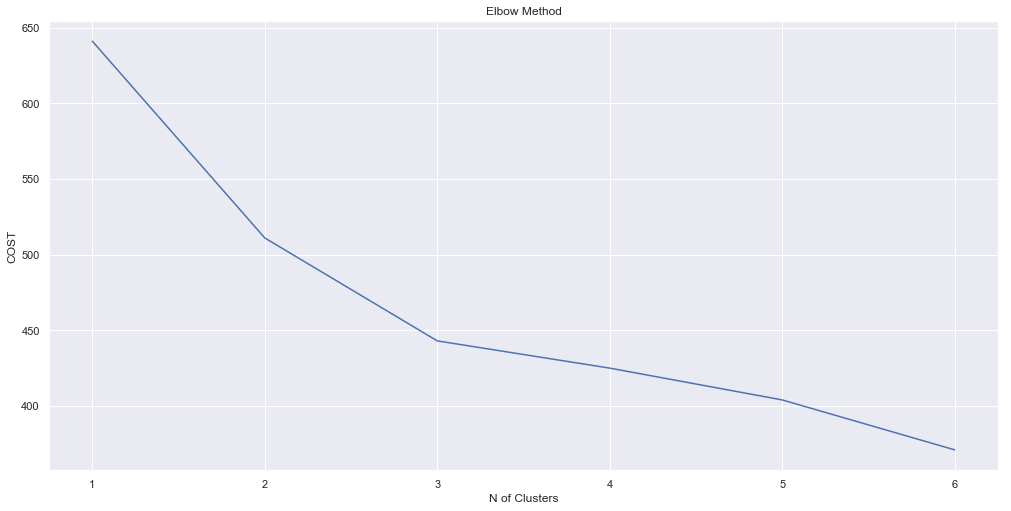

In [87]:
cost = []
for num_clusters in list(range(1,7)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df3)
    cost.append(kmode.cost_)
plt.plot(range(1, 7), cost)
plt.title('Elbow Method')
plt.xlabel('N of Clusters')
plt.ylabel('COST') #within cluster sum of squares
plt.show()

We chose K=3

In [91]:
km_cao = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
df2['fitClusters_cao'] = km_cao.fit_predict(df3)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 21, cost: 443.0
Run 1, iteration: 2/100, moves: 0, cost: 443.0


In [92]:
df2.head()

,NPS Type,After course knowledge,Division,Role,Course Type,First time,Sentiment_Analysis,fitClusters_cao
0,Promoter,Unkonwn,Unkonwn,Forecasting Analyst,Self-directed,Unkonwn,Neutral,2
1,Passive,Unkonwn,Unkonwn,Forecasting Analyst,Self-directed,Unkonwn,Neutral,2
2,Passive,Unkonwn,Unkonwn,Forecasting Analyst,Self-directed,Unkonwn,Neutral,2
3,Passive,Unkonwn,Unkonwn,Category Business Analyst,Self-directed,Unkonwn,Neutral,2
4,Promoter,Unkonwn,Unkonwn,Category Business Analyst,Self-directed,Unkonwn,Neutral,0


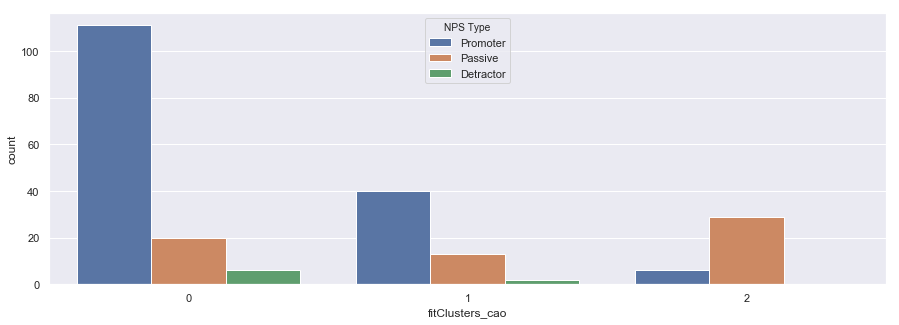

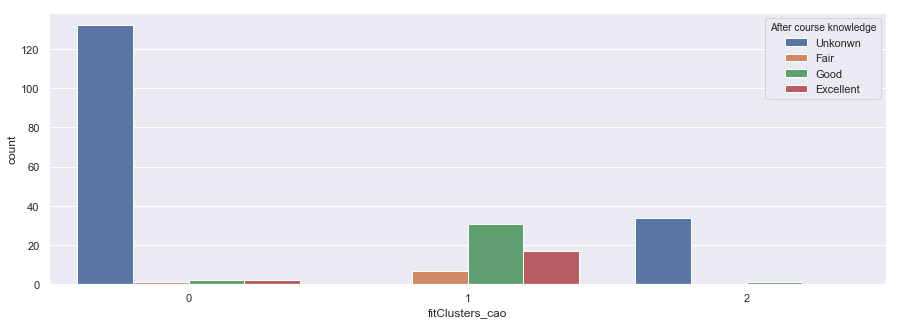

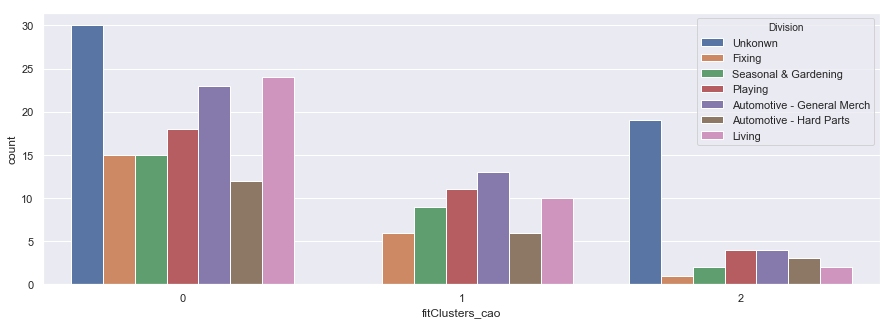

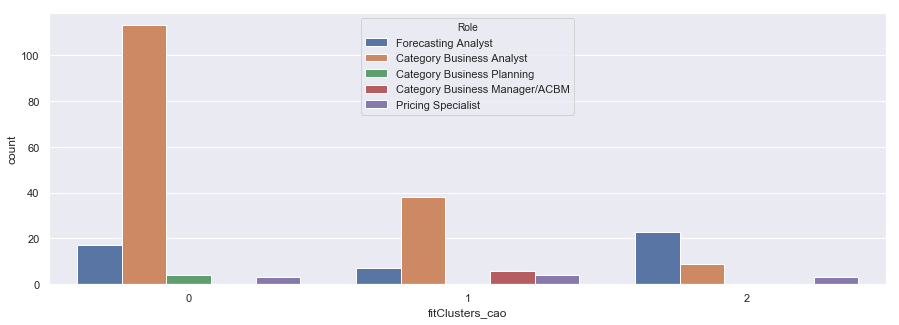

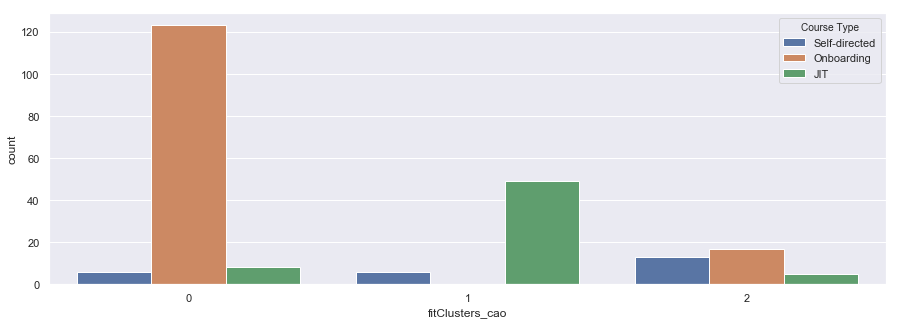

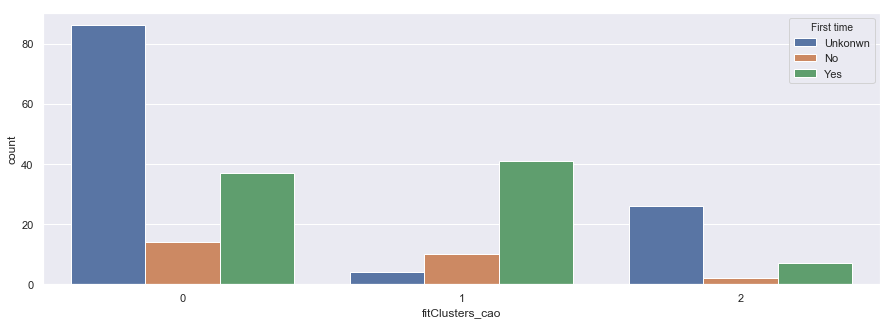

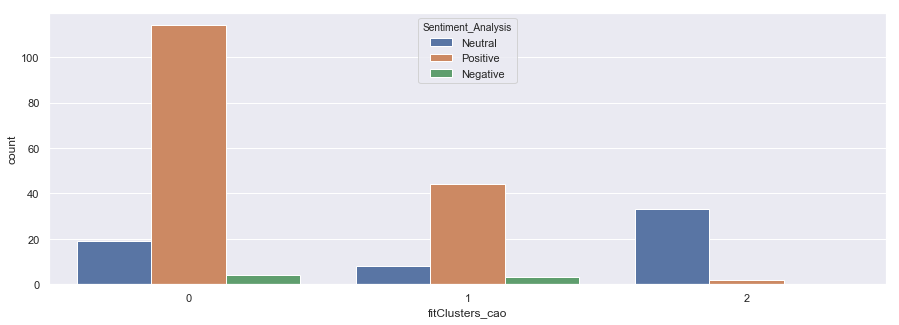

In [93]:
for col in 'NPS Type','After course knowledge','Division', 'Role','Course Type','First time','Sentiment_Analysis':
    plt.subplots(figsize = (15,5))
    sns.countplot(x='fitClusters_cao',hue=col, data = df2)
    plt.show()